# 911 Calls Capstone

## Author
Amirhossein Ojaghi<br>
GitHub: [AH-ojaghi/911-Calls-Capstone](https://github.com/AH-ojaghi/911-Calls-Capstone)

Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Set seaborn style for plots

In [2]:
sns.set_style('whitegrid')

Read the 911 emergency calls dataset

In [3]:
df = pd.read_csv('911.csv')

Display basic information about the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Show the first 3 rows of the dataframe

In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


Top 5 zip codes for 911 calls

In [6]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

Top 5 townships (twp) for 911 calls

In [7]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

Number of unique titles in the "title" column

In [8]:
df['title'].nunique()

110

Create a new column called 'Reason' by extracting the reason from the 'title'

In [9]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

Count of calls for each reason

In [10]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

Plot count of calls for each reason using seaborn

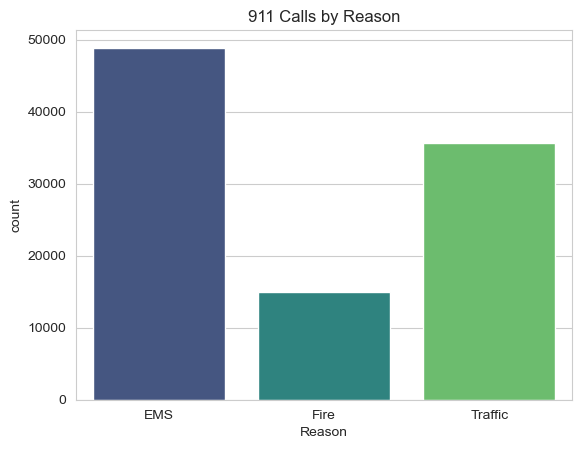

In [11]:
sns.countplot(x='Reason', data=df, hue='Reason', palette='viridis', legend=False)
plt.title('911 Calls by Reason')
plt.show()

Check data type of 'timeStamp' column (before converting)

In [12]:
type(df['timeStamp'].iloc[0])

str

Convert 'timeStamp' column from string to datetime object

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Create new columns for Hour, Month, and Day of Week from the timeStamp

In [14]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

Map Day of Week integers to actual day names

In [15]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

Plot number of calls by day of week and reason

<Axes: xlabel='Day of Week', ylabel='count'>

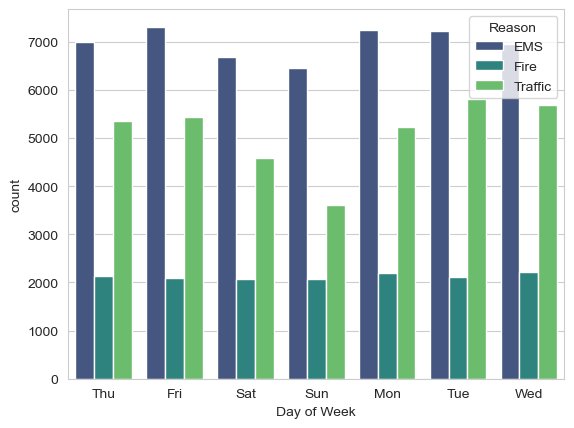

In [16]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')

Move legend outside of the plot for better visibility

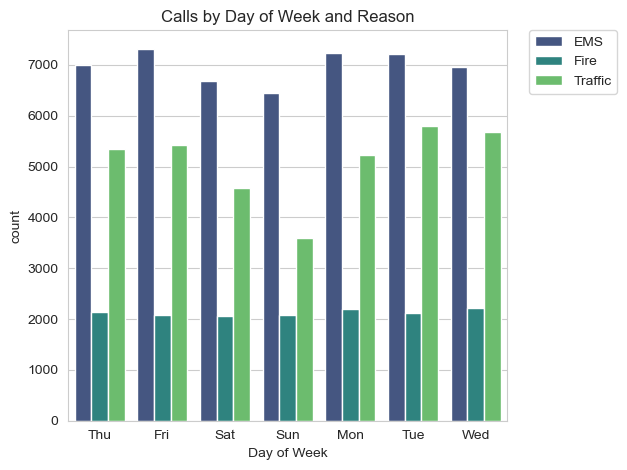

In [17]:
# Plot number of calls by day of week and reason
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')

# Move legend outside of the plot for better visibility
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Calls by Day of Week and Reason')
plt.tight_layout()  # Ensures the legend is not cut off
plt.show()


Plot number of calls by month and reason

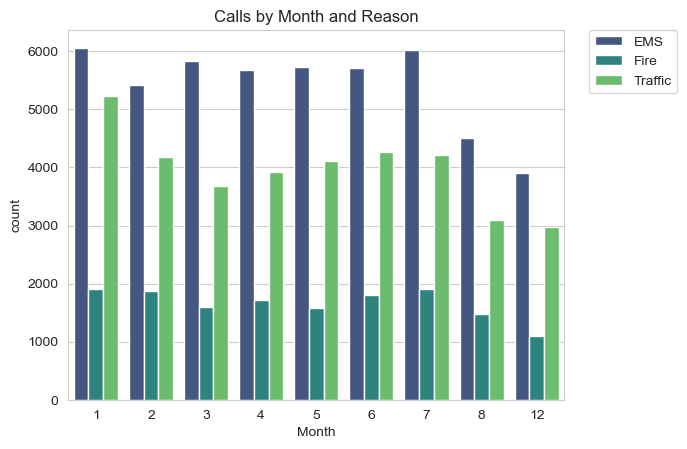

In [18]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Calls by Month and Reason')
plt.show()

Group data by month and count number of calls per month

In [19]:
by_month = df.groupby('Month').count()

Plot number of calls per month

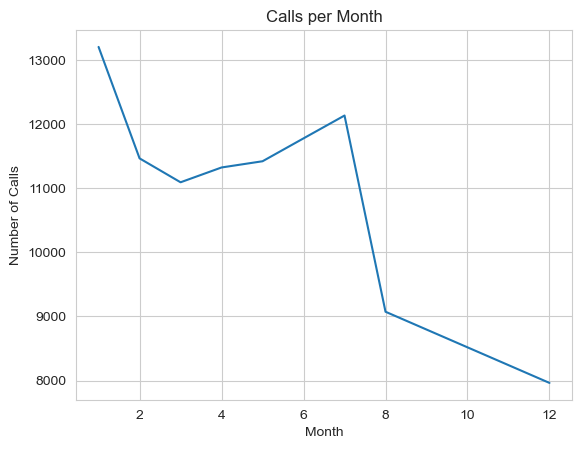

In [20]:
by_month['twp'].plot()
plt.title('Calls per Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.show()

Create a linear fit plot of number of calls per month

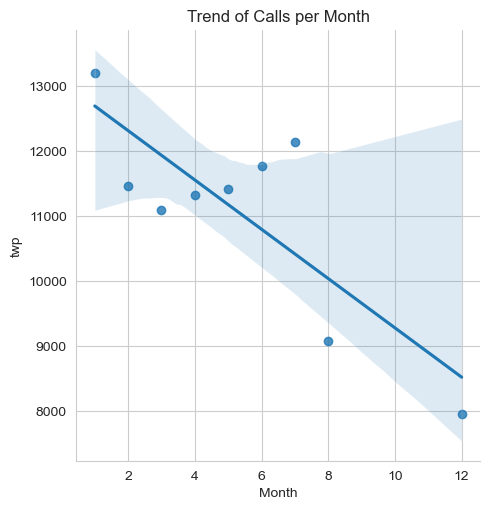

In [21]:
sns.lmplot(x='Month', y='twp', data=by_month.reset_index())
plt.title('Trend of Calls per Month')
plt.show()

Convert 'timeStamp' to date (YYYY-MM-DD) and group data by date

In [22]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

Plot number of calls per date

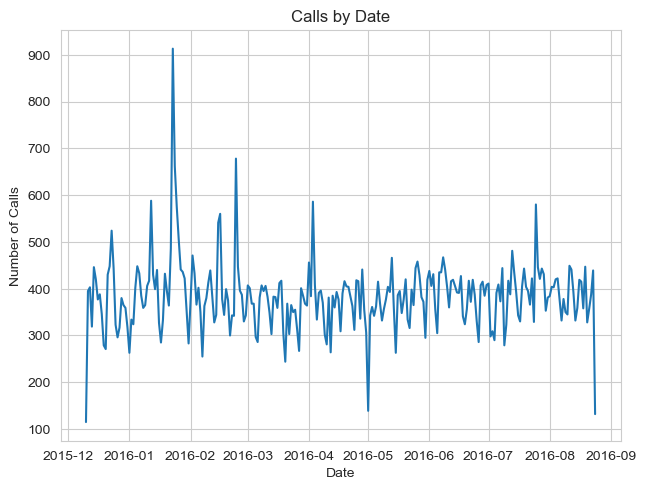

In [23]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Calls by Date')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.show()

### Plot for each reason over time<br>
Emergency type: Traffic

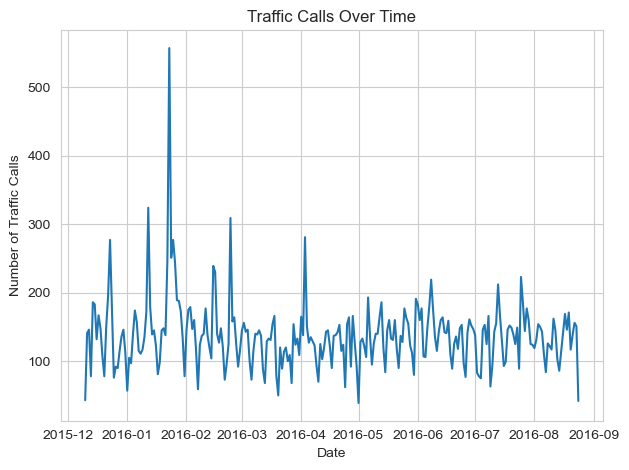

In [24]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Traffic Calls')
plt.tight_layout()
plt.show()

Emergency type: Fire

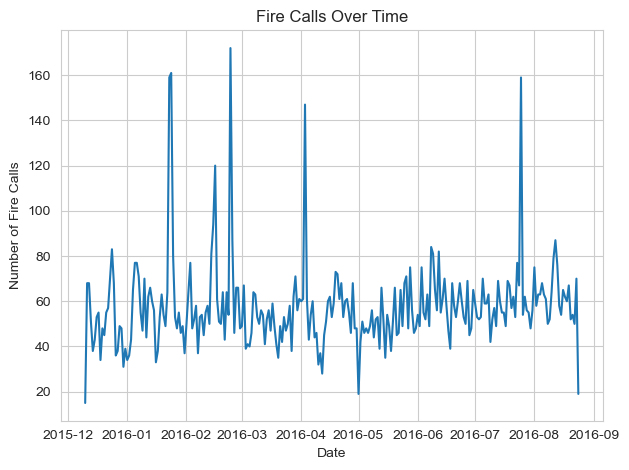

In [25]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fire Calls')
plt.tight_layout()
plt.show()

Emergency type: EMS

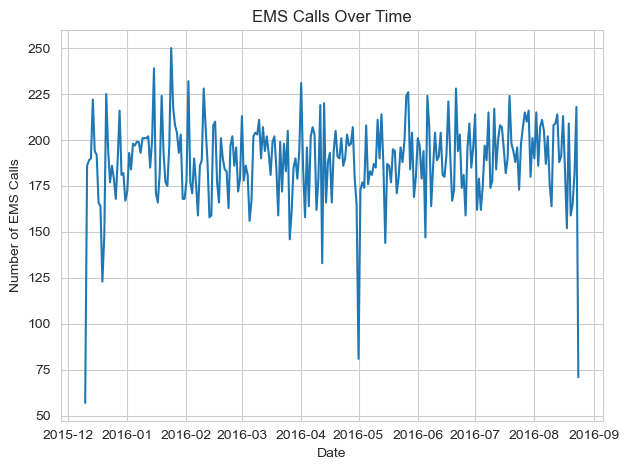

In [26]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of EMS Calls')
plt.tight_layout()
plt.show()

Create a heatmap and clustermap to visualize calls by hour and day of week

In [27]:
day_hour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

Heatmap of calls by day of week and hour

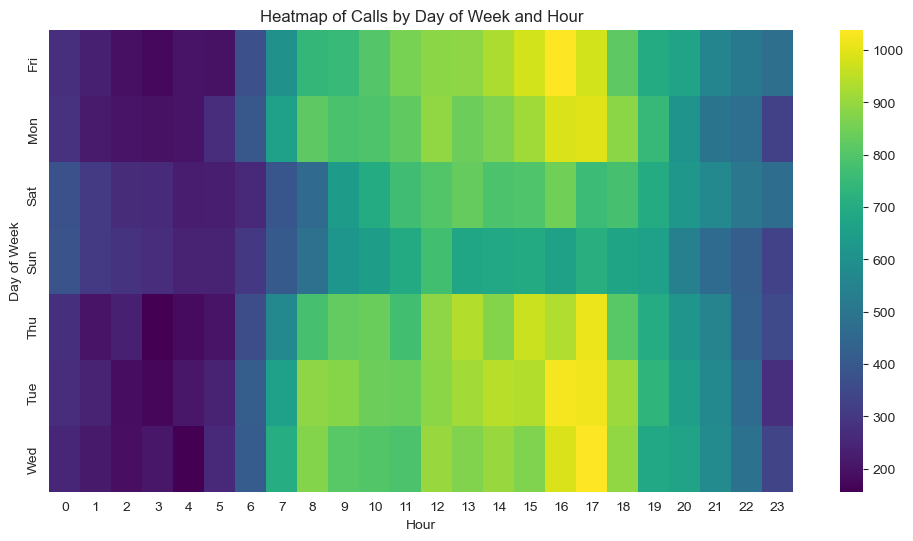

In [28]:
plt.figure(figsize=(12, 6))
sns.heatmap(day_hour, cmap='viridis')
plt.title('Heatmap of Calls by Day of Week and Hour')
plt.show()

Clustermap of calls by day of week and hour

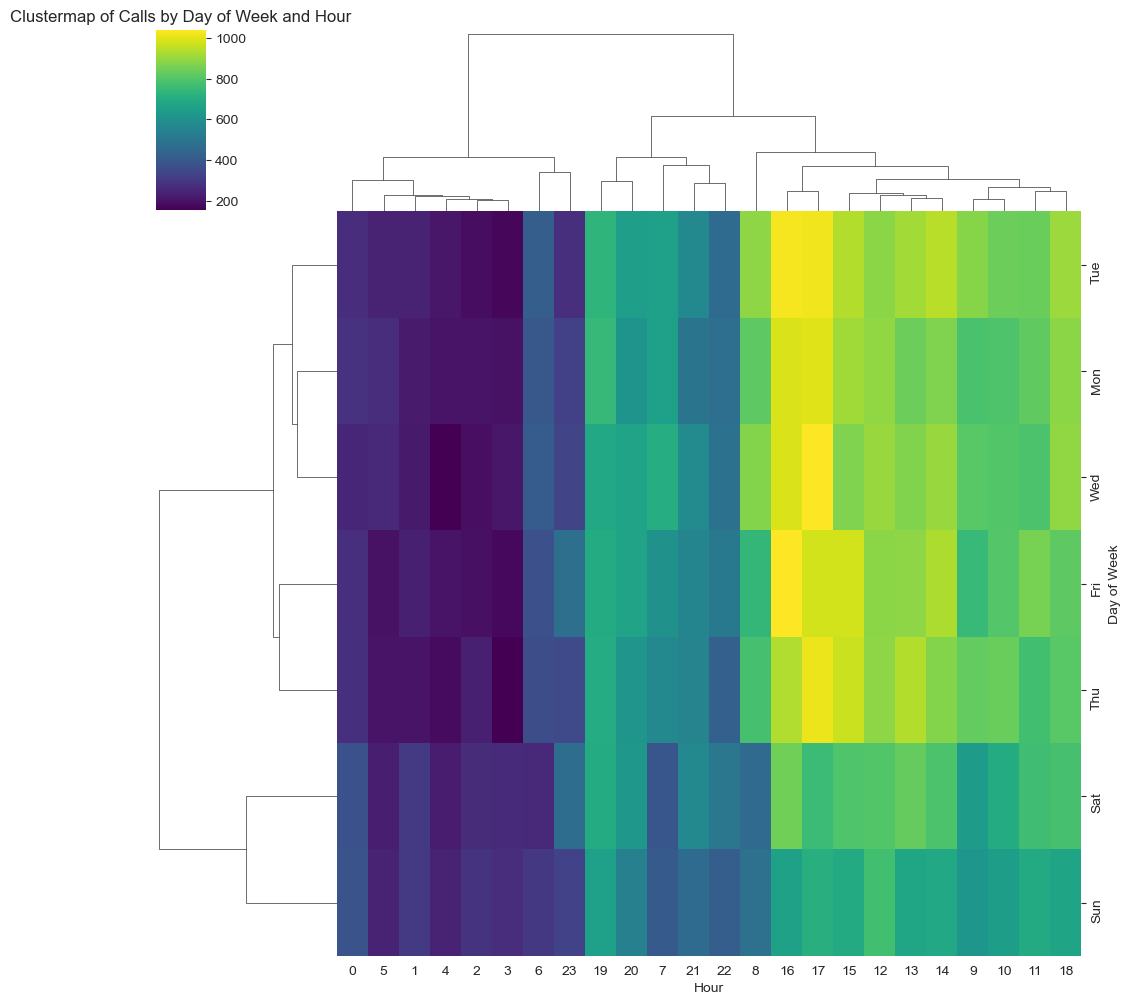

In [29]:
sns.clustermap(day_hour, cmap='viridis')
plt.title('Clustermap of Calls by Day of Week and Hour')
plt.show()

Create a heatmap and clustermap to visualize calls by month and day of week

In [30]:
day_month = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()

Heatmap of calls by day of week and month

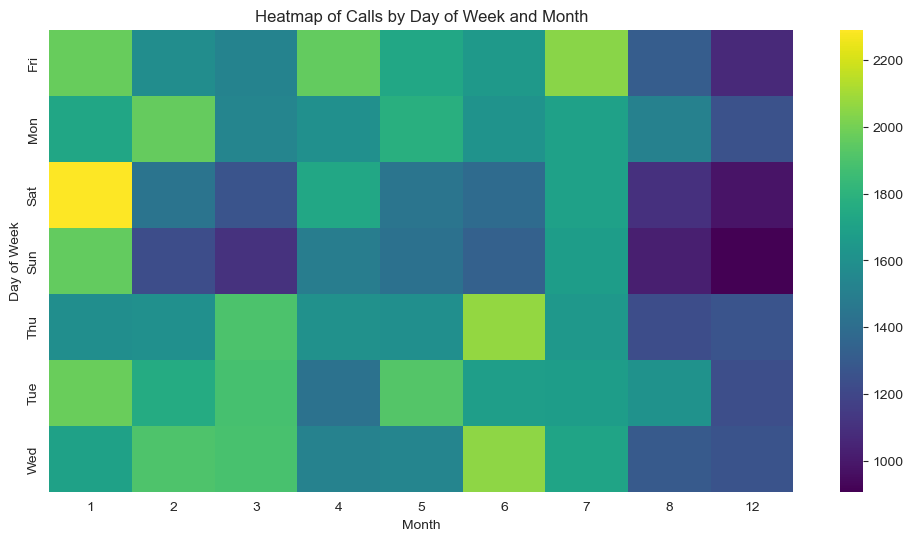

In [31]:
plt.figure(figsize=(12, 6))
sns.heatmap(day_month, cmap='viridis')
plt.title('Heatmap of Calls by Day of Week and Month')
plt.show()

Clustermap of calls by day of week and month

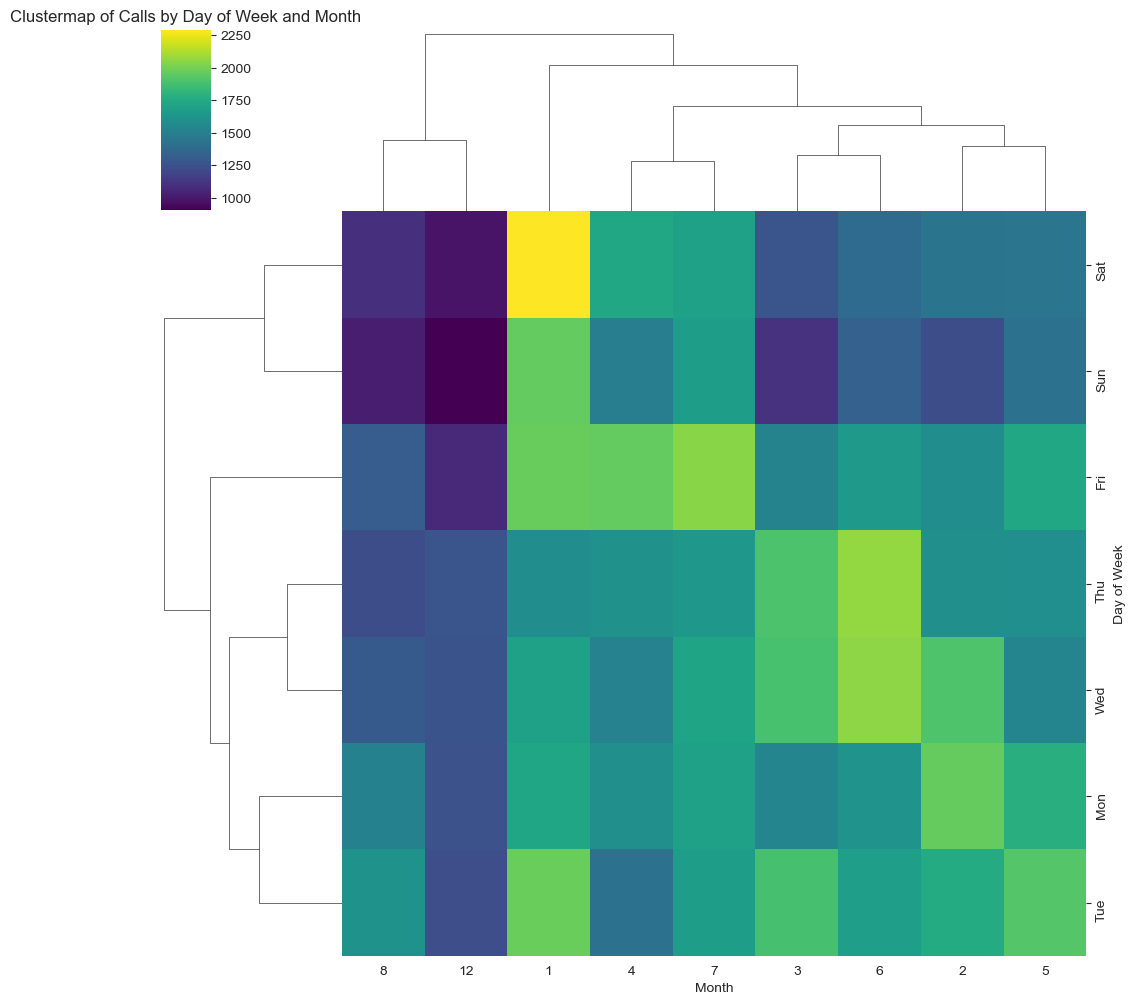

In [32]:
sns.clustermap(day_month, cmap='viridis')
plt.title('Clustermap of Calls by Day of Week and Month')
plt.show()